# Task -1 Anomaly detection
## Student ID1: 206240301
## Student ID2: 207080243
### some notes: you can install Anaconda (python 3 prefered)
#### We will use Pandas, Numpy, and SKLEARN ( they are part of Anaconda distribution)

In [6]:
!pip install seaborn

  Using cached seaborn-0.11.2-py3-none-any.whl (292 kB)


In [7]:
# Imports
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings


## Read the data

In [8]:
# file path - this for linux windows you will need "//"
f_path = "cardio_train.csv"
'''
record ID - The unique identifier for each connection record.
duration_  This feature denotes the number of seconds (rounded) of the connection. For example, a connection for 0.17s or 0.3s would be indicated with a “0” in this field.
src_bytes This field represents the number of data bytes transferred from the source to the destination (i.e., the amount of out-going bytes from the host).
dst_bytes This feature represents the number of data bytes transferred from the destination to the source (i.e., the amount of bytes received by the host).
'''
df = pd.read_csv(f_path,sep = ';',index_col=0)

In [29]:
# we could have nan values in the dataset (issue in the data) lets dropna()
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
99996,19066,2,183,105.0,180,90,3,1,0,1,0,1


Get the head of the data

In [30]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


# # Pandas DataFrame

A.  Handling missing data

In [31]:
# determin the missing data precentage
df.apply(lambda x: sum(x.isna()) / len(df))


age            0.0
gender         0.0
height         0.0
weight         0.0
ap_hi          0.0
ap_lo          0.0
cholesterol    0.0
gluc           0.0
smoke          0.0
alco           0.0
active         0.0
cardio         0.0
dtype: float64

B. Remove na/nan: 
##The Pandas function dropna() drops rows or columns (depending on the parameter you choose) that contain missing values. This function takes the axis parameter which you set as 0 to drop rows, and 1 to drop columns.

Please note that:

The alternative function is fillna() . This function will replace missing values with the value of your choice. You can replace with a fixed value such as 0, or you can use a calculation such as the mean. You can also apply different values to different columns by passing a dictionary of values per column.

In [32]:
df = df.dropna()


In [33]:
df.shape

(70000, 12)

The below code fills any missing values with the mode for that column. We used fil when we have features that do not have all placement in all cases.

In [11]:
df_numeric = df.apply(lambda x: x.fillna(x.mode()),axis=0)

C. Selecting subsets from our data

The loc method selects rows based on the index label. Let’s walk through a quick example.

In [34]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


D. DataFrame "Where" The SQL alternative for searching

In [123]:
df.where(df['src_bytes'] > 240).dropna()

,record ID,duration_,src_bytes,dst_bytes
30,31.0,0.0,278.0,957.0
38,39.0,0.0,257.0,1738.0
60,61.0,0.0,256.0,597.0
61,62.0,0.0,253.0,1906.0
62,63.0,0.0,254.0,555.0
...,...,...,...,...
256663,256664.0,0.0,288.0,3435.0
256664,256665.0,0.0,306.0,244.0
256665,256666.0,0.0,306.0,236.0
256666,256667.0,0.0,288.0,4017.0


In [20]:
 # or /use this:
df[df['src_bytes'] > 240]

,record ID,duration_,src_bytes,dst_bytes
30,31,0,278,957
38,39,0,257,1738
60,61,0,256,597
61,62,0,253,1906
62,63,0,254,555
...,...,...,...,...
256663,256664,0,288,3435
256664,256665,0,306,244
256665,256666,0,306,236
256666,256667,0,288,4017


In [124]:
#or more complex:
df[(df['src_bytes']> 240) & (df['dst_bytes']> 1000)]

,record ID,duration_,src_bytes,dst_bytes
38,39,0,257,1738
61,62,0,253,1906
63,64,0,256,2595
70,71,0,260,1837
71,72,0,256,1169
...,...,...,...,...
256660,256661,0,289,1435
256662,256663,0,282,2288
256663,256664,0,288,3435
256666,256667,0,288,4017


In [37]:
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


### Get the relevant data from the dataset 
### Age, Gender, Height, Weight, Smoking

In [9]:
df2 = df[['age','gender','height','weight','smoke']]

In [10]:
df2
#1 for woman 2 for man

,age,gender,height,weight,smoke
id,,,,,
0,18393,2,168,62.0,0
1,20228,1,156,85.0,0
2,18857,1,165,64.0,0
3,17623,2,169,82.0,0
4,17474,1,156,56.0,0
...,...,...,...,...,...
99993,19240,2,168,76.0,1
99995,22601,1,158,126.0,0
99996,19066,2,183,105.0,0


## Data exploration

### Explore the data, understand the featues, statistics visualize the inputs
#### please try the following tools and extend them: this is for a soft start :) Explain how you explore the data. Why this is important? Please note this are only some examples


skew:
    
    In probability theory and statistics, skewness is a measure of the asymmetry of the probability distribution of a real-valued random variable about its mean. The skewness value can be positive, zero, negative, or undefined.


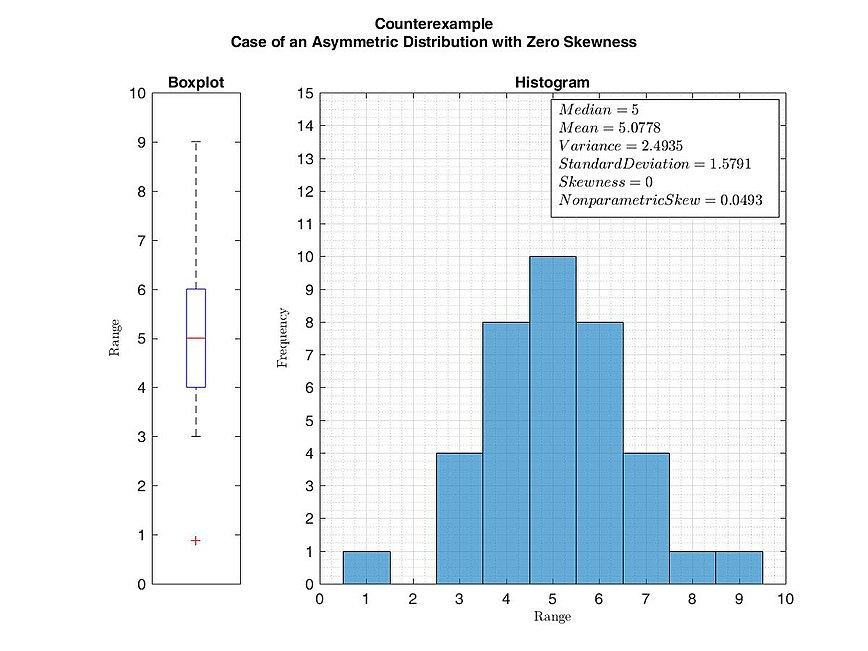

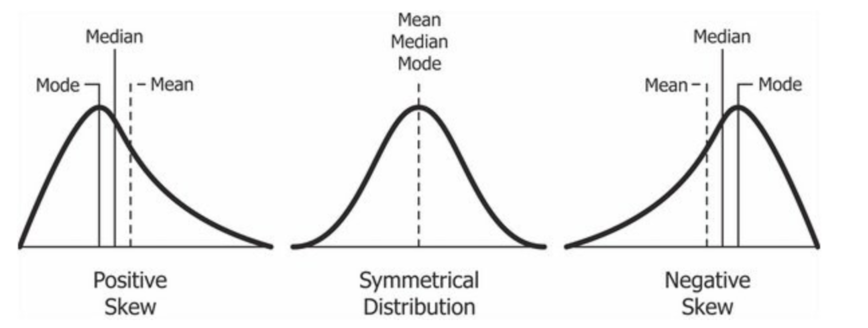

/Users/randubin/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='src_bytes', ylabel='Density'>

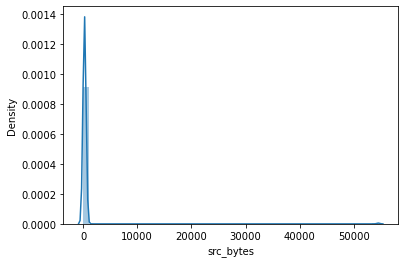

In [35]:
#histogram
sns.distplot(df['src_bytes'])

In [26]:
'''
Deviate from the normal distribution.
Have appreciable positive skewness.
Show peakedness.
'''
#skewness and kurtosis
print("Skewness: %f" % df['src_bytes'].skew())
print("Kurtosis: %f" % df['src_bytes'].kurt()) # positive show long tail , negative light tail

Skewness: 15.824471
Kurtosis: 248.739606


/Users/randubin/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness: 207.100418
Kurtosis: 61028.785029


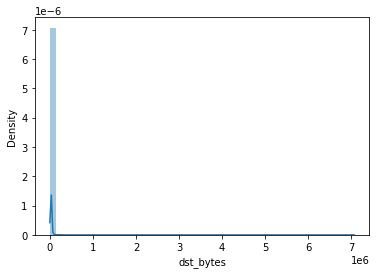

In [36]:
sns.distplot(df['dst_bytes'])
print("Skewness: %f" % df['dst_bytes'].skew())
print("Kurtosis: %f" % df['dst_bytes'].kurt())

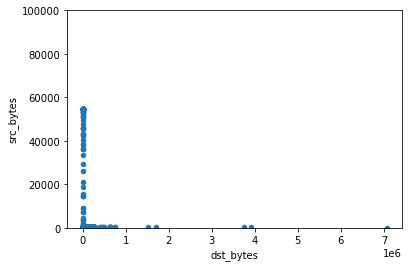

In [134]:
#Relationship with numerical variables
var = 'dst_bytes'
data = pd.concat([df['src_bytes'], df[var]], axis=1)
data.plot.scatter(x=var, y='src_bytes', ylim=(0,100000)); # do not `assume here any thing this is just examples

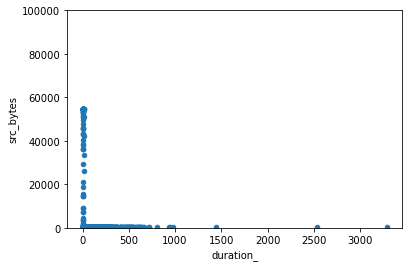

In [135]:
#scatter plot totalbsmtsf/saleprice
var = 'duration_'
data = pd.concat([df['src_bytes'], df[var]], axis=1)
data.plot.scatter(x=var, y='src_bytes', ylim=(0,100000));

In [42]:
df.corr() # what is the meaning for this ?

,record ID,duration_,src_bytes,dst_bytes
record ID,1.000000,0.027244,0.019209,-0.002970
duration_,0.027244,1.000000,-0.001714,-0.005791
src_bytes,0.019209,-0.001714,1.000000,0.010770
dst_bytes,-0.002970,-0.005791,0.010770,1.000000


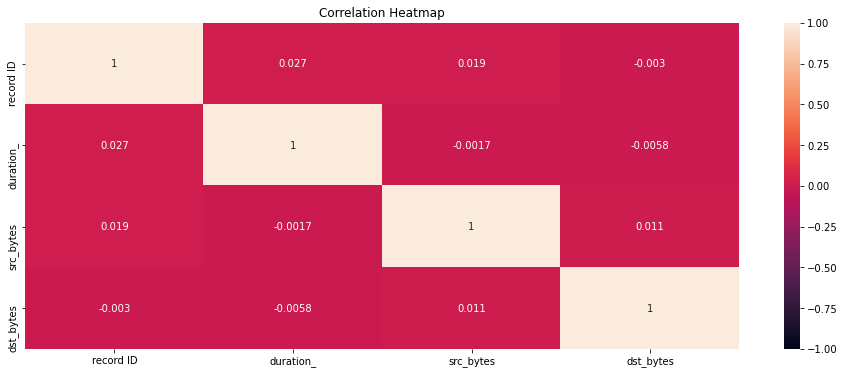

In [43]:
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12});

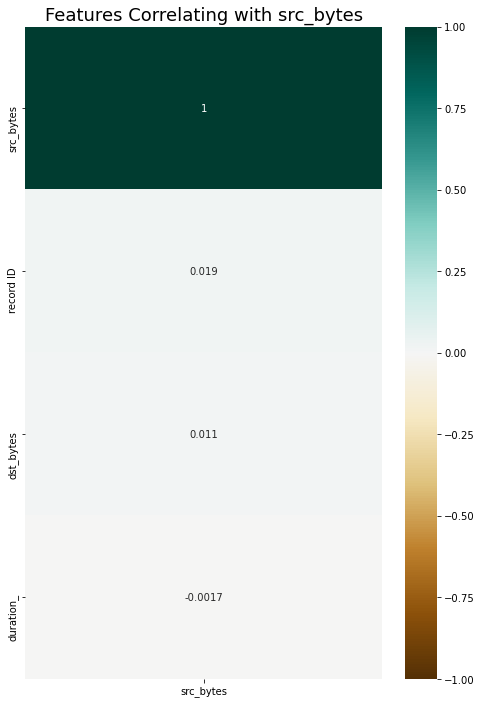

In [44]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df.corr()[['src_bytes']].sort_values(by='src_bytes', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with src_bytes', fontdict={'fontsize':18});

# Geek For Geeks
#### only for validations need

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [56]:
X1_data = df2.drop(columns=['gender']).values
y1_data = df2['gender']

In [65]:
# splitting the data into training and testing sets
X1_train, X1_test, y1_train, y1_test = train_test_split(X1_data, y1_data, test_size = 0.25, random_state = 2)
print(X1_train.shape)
print(y1_train.shape)
print(X1_test.shape)
print(y1_test.shape)

(52500, 4)
(52500,)
(17500, 4)
(17500,)


In [66]:
# fitting df1 data to the model
logreg1 = LogisticRegression()
logreg1.fit(X1_train, y1_train)

print(logreg1.intercept_)
print(logreg1.coef_)

y1_pred = logreg1.predict(X1_test)

[-0.69644642]
[[-1.45743123e-04  1.40586155e-02  5.32598596e-03  2.86774207e+00]]


In [67]:
print(df2['gender'].value_counts())
#1 for woman
#2 for man

1    45530
2    24470
Name: gender, dtype: int64


In [68]:
# creating a confusion matrix
pd.crosstab(y1_test, 
            y1_pred, 
            rownames=['Actual'], 
            colnames=['Predicted'])

Predicted,1,2
Actual,,
1,11141,263
2,4575,1521


In [71]:
print("Accuracy:", metrics.accuracy_score(y1_test, y1_pred))

Accuracy: 0.7235428571428572


# TensorFlow

In [11]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() 

In [12]:
features = 70000
alpha = 0.00001

X = tf.placeholder(tf.float32,[None,features])
Y = tf.placeholder(tf.float32, [None, 1])

# Trainable Variable Weights
W = tf.Variable(tf.zeros([features,1]))
  
# Trainable Variable Bias
b = tf.Variable(tf.zeros([1]))

In [13]:
# Hypothesis
y_ = tf.nn.sigmoid(tf.add(tf.matmul(X, W), b))
  
# Sigmoid Cross Entropy Cost Function
loss = tf.nn.sigmoid_cross_entropy_with_logits(
                    logits = y_, labels = Y)
  
# Gradient Descent Optimizer
update = tf.train.GradientDescentOptimizer(
         learning_rate = alpha).minimize(loss)

x = np.array([df2['age'].values,df2['weight'].values,df2['height'].values,df2['smoke'].values])
y = np.array([[1],[1],[0],[0]])
  
# Global Variables Initializer
init = tf.global_variables_initializer()

In [15]:
# Starting the Tensorflow Session
with tf.Session() as sess:
      
    # Initializing the Variables
    sess.run(init)
      
    # Lists for storing the changing Cost and Accuracy in every Epoch
    cost_history, accuracy_history = [], []
      
    # Iterating through all the epochs
    for epoch in range(1,100):
        cost_per_epoch = 0
          
        # Running the Optimizer
        sess.run(update, feed_dict = {X : x, Y : y})
          
        # Calculating cost on current Epoch
        c = sess.run(cost, feed_dict = {X : x, Y : y})
          
        # Calculating accuracy on current Epoch
        correct_prediction = tf.equal(tf.argmax(Y_hat, 1),
                                          tf.argmax(Y, 1))
        accuracy = tf.reduce_mean(tf.cast(correct_prediction,
                                                 tf.float32))
          
        # Storing Cost and Accuracy to the history
        cost_history.append(sum(sum(c)))
        accuracy_history.append(accuracy.eval({X : x, Y : y}) * 100)
          
        # Displaying result on current Epoch
        if epoch % 100 == 0 and epoch != 0:
            print("Epoch " + str(epoch) + " Cost: "
                            + str(cost_history[-1]))
      
    Weight = sess.run(W) # Optimized Weight
    Bias = sess.run(b)   # Optimized Bias
      
    # Final Accuracy
    correct_prediction = tf.equal(tf.argmax(Y_hat, 1),
                                      tf.argmax(Y, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, 
                                             tf.float32))
    print("\nAccuracy:", accuracy_history[-1], "%")       

InternalError: Blas xGEMV launch failed : a.shape=[1,4,70000], b.shape=[1,70000,1], m=4, n=1, k=70000
	 [[node MatMul_1
 (defined at C:\Users\matan\AppData\Local\Temp/ipykernel_23516/2367321218.py:2)
]]

Errors may have originated from an input operation.
Input Source operations connected to node MatMul_1:
In[0] Placeholder_2 (defined at C:\Users\matan\AppData\Local\Temp/ipykernel_23516/2005232206.py:4)	
In[1] Variable_2/read (defined at C:\Users\matan\AppData\Local\Temp/ipykernel_23516/2005232206.py:8)

Operation defined at: (most recent call last)
>>>   File "C:\Users\matan\AppData\Local\Programs\Python\Python38\lib\runpy.py", line 194, in _run_module_as_main
>>>     return _run_code(code, main_globals, None,
>>> 
>>>   File "C:\Users\matan\AppData\Local\Programs\Python\Python38\lib\runpy.py", line 87, in _run_code
>>>     exec(code, run_globals)
>>> 
>>>   File "C:\Users\matan\My PC (DESKTOP-RLTMVS3)\Desktop\NLP\Gender Classification\nlpenv\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
>>>     app.launch_new_instance()
>>> 
>>>   File "C:\Users\matan\My PC (DESKTOP-RLTMVS3)\Desktop\NLP\Gender Classification\nlpenv\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
>>>     app.start()
>>> 
>>>   File "C:\Users\matan\My PC (DESKTOP-RLTMVS3)\Desktop\NLP\Gender Classification\nlpenv\lib\site-packages\ipykernel\kernelapp.py", line 677, in start
>>>     self.io_loop.start()
>>> 
>>>   File "C:\Users\matan\My PC (DESKTOP-RLTMVS3)\Desktop\NLP\Gender Classification\nlpenv\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
>>>     self.asyncio_loop.run_forever()
>>> 
>>>   File "C:\Users\matan\AppData\Local\Programs\Python\Python38\lib\asyncio\base_events.py", line 570, in run_forever
>>>     self._run_once()
>>> 
>>>   File "C:\Users\matan\AppData\Local\Programs\Python\Python38\lib\asyncio\base_events.py", line 1859, in _run_once
>>>     handle._run()
>>> 
>>>   File "C:\Users\matan\AppData\Local\Programs\Python\Python38\lib\asyncio\events.py", line 81, in _run
>>>     self._context.run(self._callback, *self._args)
>>> 
>>>   File "C:\Users\matan\My PC (DESKTOP-RLTMVS3)\Desktop\NLP\Gender Classification\nlpenv\lib\site-packages\ipykernel\kernelbase.py", line 457, in dispatch_queue
>>>     await self.process_one()
>>> 
>>>   File "C:\Users\matan\My PC (DESKTOP-RLTMVS3)\Desktop\NLP\Gender Classification\nlpenv\lib\site-packages\ipykernel\kernelbase.py", line 446, in process_one
>>>     await dispatch(*args)
>>> 
>>>   File "C:\Users\matan\My PC (DESKTOP-RLTMVS3)\Desktop\NLP\Gender Classification\nlpenv\lib\site-packages\ipykernel\kernelbase.py", line 353, in dispatch_shell
>>>     await result
>>> 
>>>   File "C:\Users\matan\My PC (DESKTOP-RLTMVS3)\Desktop\NLP\Gender Classification\nlpenv\lib\site-packages\ipykernel\kernelbase.py", line 648, in execute_request
>>>     reply_content = await reply_content
>>> 
>>>   File "C:\Users\matan\My PC (DESKTOP-RLTMVS3)\Desktop\NLP\Gender Classification\nlpenv\lib\site-packages\ipykernel\ipkernel.py", line 353, in do_execute
>>>     res = shell.run_cell(code, store_history=store_history, silent=silent)
>>> 
>>>   File "C:\Users\matan\My PC (DESKTOP-RLTMVS3)\Desktop\NLP\Gender Classification\nlpenv\lib\site-packages\ipykernel\zmqshell.py", line 533, in run_cell
>>>     return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
>>> 
>>>   File "C:\Users\matan\My PC (DESKTOP-RLTMVS3)\Desktop\NLP\Gender Classification\nlpenv\lib\site-packages\IPython\core\interactiveshell.py", line 2901, in run_cell
>>>     result = self._run_cell(
>>> 
>>>   File "C:\Users\matan\My PC (DESKTOP-RLTMVS3)\Desktop\NLP\Gender Classification\nlpenv\lib\site-packages\IPython\core\interactiveshell.py", line 2947, in _run_cell
>>>     return runner(coro)
>>> 
>>>   File "C:\Users\matan\My PC (DESKTOP-RLTMVS3)\Desktop\NLP\Gender Classification\nlpenv\lib\site-packages\IPython\core\async_helpers.py", line 68, in _pseudo_sync_runner
>>>     coro.send(None)
>>> 
>>>   File "C:\Users\matan\My PC (DESKTOP-RLTMVS3)\Desktop\NLP\Gender Classification\nlpenv\lib\site-packages\IPython\core\interactiveshell.py", line 3172, in run_cell_async
>>>     has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
>>> 
>>>   File "C:\Users\matan\My PC (DESKTOP-RLTMVS3)\Desktop\NLP\Gender Classification\nlpenv\lib\site-packages\IPython\core\interactiveshell.py", line 3364, in run_ast_nodes
>>>     if (await self.run_code(code, result,  async_=asy)):
>>> 
>>>   File "C:\Users\matan\My PC (DESKTOP-RLTMVS3)\Desktop\NLP\Gender Classification\nlpenv\lib\site-packages\IPython\core\interactiveshell.py", line 3444, in run_code
>>>     exec(code_obj, self.user_global_ns, self.user_ns)
>>> 
>>>   File "C:\Users\matan\AppData\Local\Temp/ipykernel_23516/2367321218.py", line 2, in <module>
>>>     y_ = tf.nn.sigmoid(tf.add(tf.matmul(X, W), b))
>>> 

Original stack trace for 'MatMul_1':
  File "C:\Users\matan\AppData\Local\Programs\Python\Python38\lib\runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\matan\AppData\Local\Programs\Python\Python38\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\matan\My PC (DESKTOP-RLTMVS3)\Desktop\NLP\Gender Classification\nlpenv\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\matan\My PC (DESKTOP-RLTMVS3)\Desktop\NLP\Gender Classification\nlpenv\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\matan\My PC (DESKTOP-RLTMVS3)\Desktop\NLP\Gender Classification\nlpenv\lib\site-packages\ipykernel\kernelapp.py", line 677, in start
    self.io_loop.start()
  File "C:\Users\matan\My PC (DESKTOP-RLTMVS3)\Desktop\NLP\Gender Classification\nlpenv\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
    self.asyncio_loop.run_forever()
  File "C:\Users\matan\AppData\Local\Programs\Python\Python38\lib\asyncio\base_events.py", line 570, in run_forever
    self._run_once()
  File "C:\Users\matan\AppData\Local\Programs\Python\Python38\lib\asyncio\base_events.py", line 1859, in _run_once
    handle._run()
  File "C:\Users\matan\AppData\Local\Programs\Python\Python38\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\matan\My PC (DESKTOP-RLTMVS3)\Desktop\NLP\Gender Classification\nlpenv\lib\site-packages\ipykernel\kernelbase.py", line 457, in dispatch_queue
    await self.process_one()
  File "C:\Users\matan\My PC (DESKTOP-RLTMVS3)\Desktop\NLP\Gender Classification\nlpenv\lib\site-packages\ipykernel\kernelbase.py", line 446, in process_one
    await dispatch(*args)
  File "C:\Users\matan\My PC (DESKTOP-RLTMVS3)\Desktop\NLP\Gender Classification\nlpenv\lib\site-packages\ipykernel\kernelbase.py", line 353, in dispatch_shell
    await result
  File "C:\Users\matan\My PC (DESKTOP-RLTMVS3)\Desktop\NLP\Gender Classification\nlpenv\lib\site-packages\ipykernel\kernelbase.py", line 648, in execute_request
    reply_content = await reply_content
  File "C:\Users\matan\My PC (DESKTOP-RLTMVS3)\Desktop\NLP\Gender Classification\nlpenv\lib\site-packages\ipykernel\ipkernel.py", line 353, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "C:\Users\matan\My PC (DESKTOP-RLTMVS3)\Desktop\NLP\Gender Classification\nlpenv\lib\site-packages\ipykernel\zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "C:\Users\matan\My PC (DESKTOP-RLTMVS3)\Desktop\NLP\Gender Classification\nlpenv\lib\site-packages\IPython\core\interactiveshell.py", line 2901, in run_cell
    result = self._run_cell(
  File "C:\Users\matan\My PC (DESKTOP-RLTMVS3)\Desktop\NLP\Gender Classification\nlpenv\lib\site-packages\IPython\core\interactiveshell.py", line 2947, in _run_cell
    return runner(coro)
  File "C:\Users\matan\My PC (DESKTOP-RLTMVS3)\Desktop\NLP\Gender Classification\nlpenv\lib\site-packages\IPython\core\async_helpers.py", line 68, in _pseudo_sync_runner
    coro.send(None)
  File "C:\Users\matan\My PC (DESKTOP-RLTMVS3)\Desktop\NLP\Gender Classification\nlpenv\lib\site-packages\IPython\core\interactiveshell.py", line 3172, in run_cell_async
    has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
  File "C:\Users\matan\My PC (DESKTOP-RLTMVS3)\Desktop\NLP\Gender Classification\nlpenv\lib\site-packages\IPython\core\interactiveshell.py", line 3364, in run_ast_nodes
    if (await self.run_code(code, result,  async_=asy)):
  File "C:\Users\matan\My PC (DESKTOP-RLTMVS3)\Desktop\NLP\Gender Classification\nlpenv\lib\site-packages\IPython\core\interactiveshell.py", line 3444, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\matan\AppData\Local\Temp/ipykernel_23516/2367321218.py", line 2, in <module>
    y_ = tf.nn.sigmoid(tf.add(tf.matmul(X, W), b))
  File "C:\Users\matan\My PC (DESKTOP-RLTMVS3)\Desktop\NLP\Gender Classification\nlpenv\lib\site-packages\tensorflow\python\util\traceback_utils.py", line 150, in error_handler
    return fn(*args, **kwargs)
  File "C:\Users\matan\My PC (DESKTOP-RLTMVS3)\Desktop\NLP\Gender Classification\nlpenv\lib\site-packages\tensorflow\python\util\dispatch.py", line 1096, in op_dispatch_handler
    return dispatch_target(*args, **kwargs)
  File "C:\Users\matan\My PC (DESKTOP-RLTMVS3)\Desktop\NLP\Gender Classification\nlpenv\lib\site-packages\tensorflow\python\ops\math_ops.py", line 3700, in matmul
    return gen_math_ops.mat_mul(
  File "C:\Users\matan\My PC (DESKTOP-RLTMVS3)\Desktop\NLP\Gender Classification\nlpenv\lib\site-packages\tensorflow\python\ops\gen_math_ops.py", line 6033, in mat_mul
    _, _, _op, _outputs = _op_def_library._apply_op_helper(
  File "C:\Users\matan\My PC (DESKTOP-RLTMVS3)\Desktop\NLP\Gender Classification\nlpenv\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 744, in _apply_op_helper
    op = g._create_op_internal(op_type_name, inputs, dtypes=None,
  File "C:\Users\matan\My PC (DESKTOP-RLTMVS3)\Desktop\NLP\Gender Classification\nlpenv\lib\site-packages\tensorflow\python\framework\ops.py", line 3697, in _create_op_internal
    ret = Operation(
  File "C:\Users\matan\My PC (DESKTOP-RLTMVS3)\Desktop\NLP\Gender Classification\nlpenv\lib\site-packages\tensorflow\python\framework\ops.py", line 2101, in __init__
    self._traceback = tf_stack.extract_stack_for_node(self._c_op)


# Introduction to ML in python

I will take here a supervided dataset. The idea is to demonstrate you some concepts

In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm
# Load Dataset
X, y = datasets.load_iris(return_X_y=True) # note this is a known dataset with dedicated loader. In your work you can use a custom one.
X.shape, y.shape

((150, 4), (150,))

Let's split the data 80:20

In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)

print("Train:",X_train.shape, y_train.shape)

print("Test", X_test.shape, y_test.shape)

Train: (120, 4) (120,)
Test (30, 4) (30,)


In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=0)

print(y_test)

X_train.shape, y_train.shape

X_test.shape, y_test.shape
'''
When evaluating different settings (“hyperparameters”) for estimators, such as the C 
setting that must be manually set for an SVM, there is still a risk of overfitting
on the test set because the parameters can be tweaked until the estimator performs optimally. 
You can optimize "C" with GridSearch.
'''

clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
print('the accuracy here is :',clf.score(X_test, y_test))
#let's predict the data
y_predicted = clf.predict(X_test)
# lets review the labels
labels = np.unique(y)
print("unique labels",labels)
# The confusion matrix is:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_predicted, labels=labels)

[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1 1 1 2 0 2 0 0 1 2 2 2 2 1 2 1 1 2 2 2 2 1 2]
the accuracy here is : 0.9666666666666667
unique labels [0 1 2]


array([[16,  0,  0],
       [ 0, 22,  1],
       [ 0,  1, 20]], dtype=int64)

Here we have a problem:
    
    Our data is trained with non optimized parameters.

How can we solve it?:
     
     cross-validation  + k-Fold
     
     The k-fold CV, the training set is split into k smaller sets (other approaches are described below, but generally follow the same principles). The following procedure is followed for each of the k “folds”:

    A model is trained using  of the folds as training data;

    the resulting model is validated on the remaining part of the data (i.e., it is used as a test set to compute a performance measure such as accuracy).
    

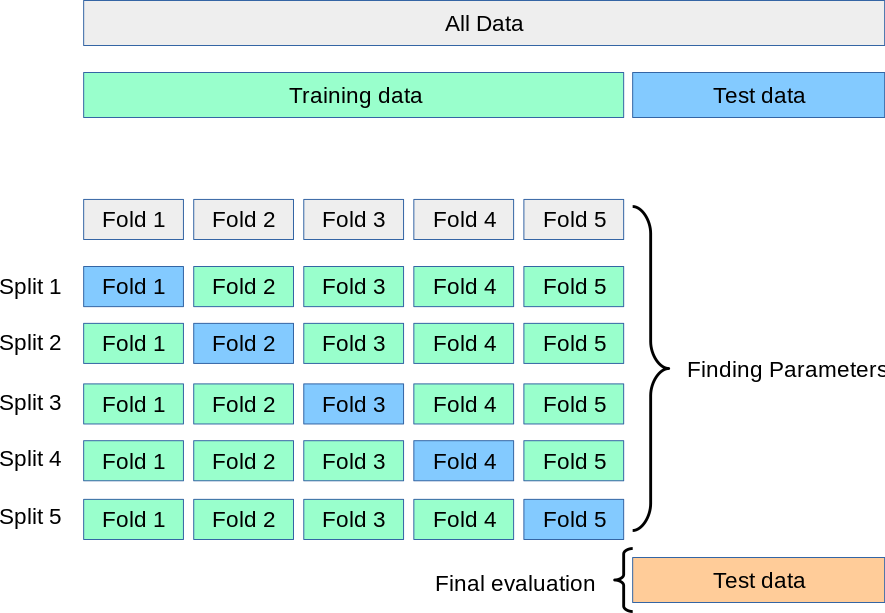

In [148]:
from sklearn.model_selection import cross_val_score
clf = svm.SVC(kernel='linear', C=1, random_state=42)
scores = cross_val_score(clf, X, y, cv=5)
print("we are getting in scores the result of each iterration. Len:",len(scores), "values:", scores)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
print("NOTE: the result here are different! why? - OVERFITING")

we are getting in scores the result of each iterration. Len: 5 values: [0.96666667 1.         0.96666667 0.96666667 1.        ]
0.98 accuracy with a standard deviation of 0.02
NOTE: the result here are different! why? - OVERFITING


Now let's see how can we use data normalization with this example

In [149]:
from sklearn import preprocessing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)
print("Let's see if the training size effect us ? change from 0.2 to 0.4")
#standardScaler normalization
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_transformed = scaler.transform(X_train)
clf = svm.SVC(C=1).fit(X_train_transformed, y_train)
X_test_transformed = scaler.transform(X_test)
print("result score: ",clf.score(X_test_transformed, y_test))


#changing:
from sklearn import preprocessing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=0)
print("changed")
#standardScaler normalization
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_transformed = scaler.transform(X_train)
clf = svm.SVC(C=1).fit(X_train_transformed, y_train)
X_test_transformed = scaler.transform(X_test)
print("result score: ",clf.score(X_test_transformed, y_test))

Let's see if the training size effect us ? change from 0.2 to 0.4
result score:  1.0
changed
result score:  0.9333333333333333


Lets write it with piplines:

In [63]:
from sklearn.pipeline import make_pipeline
clf = make_pipeline(preprocessing.StandardScaler(), svm.SVC(C=1))
cross_val_score(clf, X, y, cv=5) #note -we can use other CV methods see sklearn.


array([0.96666667, 0.96666667, 0.96666667, 0.93333333, 1.        ])

Let's try a different pipline approach

In [150]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
classifier_names = ["Logistic Regression", "KNN", "Random Forest","SVM"]

classifiers = [LogisticRegression(), KNeighborsClassifier(), RandomForestClassifier(), LinearSVC()]

zipped_clf = zip(classifier_names,classifiers)

In [151]:
def classifier(classifier, t_train, c_train, t_test, c_test):
    result = []
    for n,c in classifier:
        checker_pipeline = Pipeline([
            ('standardize', StandardScaler()),                         
            ('classifier', c)
        ])
        print("Validation result for {}".format(n))
        print(c)
        clf_acc = fit_classifier(checker_pipeline, t_train, c_train, t_test,c_test)
        result.append((n,clf_acc))
    return result

In [152]:
def fit_classifier(pipeline, x_train, y_train, x_test, y_test):
    model_fit = pipeline.fit(x_train, y_train)
    y_pred = model_fit.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("accuracy score: {0:.2f}%".format(accuracy*100))
    return accuracy

In [153]:
result = classifier(zipped_clf, X_train, y_train, X_test, y_test)


Validation result for Logistic Regression
LogisticRegression()
accuracy score: 93.33%
Validation result for KNN
KNeighborsClassifier()
accuracy score: 93.33%
Validation result for Random Forest
RandomForestClassifier()
accuracy score: 93.33%
Validation result for SVM
LinearSVC()
accuracy score: 91.67%


Please note in this example we didn't optimize the classifiers.

# Back to the task

Summary of data exploration:

    Did this help you?
    What did you find?
    What the data exploration tell you about the data and the possible attacks?

# Machine Learning Algorithms

Please note that here you have to show AI/ML/DL algorithm. You can't use if else or "as we can see" text approach.\

# Summary and results

In [ ]:
Use the label data I will provide to show if you menege to detect anomalies

# Create the final submission results

In [ ]:
'''
What to submit?

record ID - The unique identifier for each connection record.
is_anomaly?_  This binary field indicates your detection result: 0 denotes the transmission is normal, 1 indicates anomalous.
Summary Report

'''